# Molly exercise

This exercise will introduce you more to the [Molly.jl](https://github.com/JuliaMolSim/Molly.jl) package for molecular simulation. Julia 1.10 and Molly 0.22.3 or later are recommended. Basic familiarity with Julia and molecular dynamics concepts is assumed. You may find the [Molly documentation](https://juliamolsim.github.io/Molly.jl/stable/documentation) and the [Julia documentation](https://docs.julialang.org/en/v1) helpful.

First, we import the packages that we need. Make sure that the running kernel is Julia.

In [1]:
using Molly
using StaticArrays
using Unitful
using Bio3DView
using Plots
using KernelDensity
using Measurements

using LinearAlgebra
using Printf
using Statistics

In [2]:
pkgversion(Molly)

v"0.22.3"

For this exercise you will also need the files `dipeptide_nowater.pdb` and `dipeptide_equil.pdb`, which can be found alongside this notebook, in the current directory.

We will be running short simulations of alanine dipeptide, which is the amino acid alanine with an acetyl group on the N-terminus and a N-methylamide group on the C-terminus. The simulations are kept short so they run fairly quickly on any computer. In reality they are far too short for real analysis, so the results here should be used for educational purposes only.

We can get a quick look at `dipeptide_nowater.pdb`, which contains just alanine dipeptide, with Bio3DView.jl. You can click and drag the molecule.

In [3]:
viewfile("dipeptide_nowater.pdb", style=Style("stick"))

HTML{String}("<script type='text/javascript'>/*! jQuery v3.3.1 | (c) JS Foundation and other contributors | jquery.org/license */\n!function(e,t){\"use strict\";\"object\"==typeof module&&\"object\"==typeof module.exports?module.exports=e.document?t(e,!0):function(e){if(!e.document)throw new Error(\"jQuery requires a window with a document\");return t(e)}:t(e)}(\"undefined\"!=typeof window?window:this,function(e,t){\"use strict\";var n=[],r=e.document,i=Object.getPrototypeOf,o=n.slice,a=n.concat,s=n.push,u=n.indexOf,l={},c=l.toString,f=l.hasOwnProperty,p=f.toString,d=p.call(Object),h={},g=function e(t){return\"function\"==typeof t&&\"number\"!=typeof t.nodeType},y=function e(t){return null!=t&&t===t.window},v={type:!0,src:!0,noModule:!0};function m(e,t,n){var i,o=(t=t||r).createElement(\"script\");if(o.text=e,n)for(i in v)n[i]&&(o[i]=n[i]);t.head.appendChild(o).parentNode.removeChild(o)}function x(e){return null==e?e+\"\":\"object\"==typeof e||\"function\"==typeof e?l[c.call(e)]||\"object\":typeof e}var b=\"3.3.1\",w=function(e,t){return new w.fn.init(e,t)},T=/^[\\s\\uFEFF\\xA0]+|[\\s\\uFEFF\\xA0]+\$/g;w.fn=w.prototype={jquery:\"3.3.1\",constructor:w,length:0,toArray:function(){return o.call(this)},get:function(e){return null==e?o.call(this):e<0?this[e+this.length]:this[e]},pushStack:function(e){var t=w.merge(this.constructor(),e);return t.prevObject=this,t},each:function(e){return w.each(this,e)},map:function(e){return this.pushStack(w.map(this,function(t,n){return e.call(t,n,t)}))},slice:function(){return this.pushStack(o.apply(this,arguments))},first:function(){return this.eq(0)},last:function(){return this.eq(-1)},eq:function(e){var t=this.length,n=+e+(e<0?t:0);return this.pushStack(n>=0&&n<t?[this[n]]:[])},end:function(){return this.prevObject||this.constructor()},push:s,sort:n.sort,splice:n.splice},w.extend=w.fn.extend=function(){var e,t,n,r,i,o,a=arguments[0]||{},s=1,u=arguments.length,l=!1;for(\"boolean\"==typeof a&&(l=a,a=arguments[s]||{},s++),\"object\"==typeof a||g(a)||(a={}),s===u&&(a=this,s--);s<u;s++)if(null!=(e=arguments[s]))for(t in e)n=a[t],a!==(r=e[t])&&(l&&r&&(w.isPlainObject(r)||(i=Array.isArray(r)))?(i?(i=!1,o=n&&Array.isArray(n)?n:[]):o=n&&w.isPlainObject(n)?n:{},a[t]=w.extend(l,o,r)):void 0!==r&&(a[t]=r));return a},w.extend({expando:\"jQuery\"+(\"3.3.1\"+Math.random()).replace(/\\D/g,\"\"),isReady:!0,error:function(e){throw new Error(e)},noop:function(){},isPlainObject:function(e){var t,n;return!(!e||\"[object Object]\"!==c.call(e))&&(!(t=i(e))||\"function\"==typeof(n=f.call(t,\"constructor\")&&t.constructor)&&p.call(n)===d)},isEmptyObject:function(e){var t;for(t in e)return!1;return!0},globalEval:function(e){m(e)},each:function(e,t){var n,r=0;if(C(e)){for(n=e.length;r<n;r++)if(!1===t.call(e[r],r,e[r]))break}else for(r in e)if(!1===t.call(e[r],r,e[r]))break;return e},trim:function(e){return null==e?\"\":(e+\"\").replace(T,\"\")},makeArray:function(e,t){var n=t||[];return null!=e&&(C(Object(e))?w.merge(n,\"string\"==typeof e?[e]:e):s.call(n,e)),n},inArray:function(e,t,n){return null==t?-1:u.call(t,e,n)},merge:function(e,t){for(var n=+t.length,r=0,i=e.length;r<n;r++)e[i++]=t[r];return e.length=i,e},grep:function(e,t,n){for(var r,i=[],o=0,a=e.length,s=!n;o<a;o++)(r=!t(e[o],o))!==s&&i.push(e[o]);return i},map:function(e,t,n){var r,i,o=0,s=[];if(C(e))for(r=e.length;o<r;o++)null!=(i=t(e[o],o,n))&&s.push(i);else for(o in e)null!=(i=t(e[o],o,n))&&s.push(i);return a.apply([],s)},guid:1,support:h}),\"function\"==typeof Symbol&&(w.fn[Symbol.iterator]=n[Symbol.iterator]),w.each(\"Boolean Number String Function Array Date RegExp Object Error Symbol\".split(\" \"),function(e,t){l[\"[object \"+t+\"]\"]=t.toLowerCase()});function C(e){var t=!!e&&\"length\"in e&&e.length,n=x(e);return!g(e)&&!y(e)&&(\"array\"===n||0===t||\"number\"==typeof t&&t>0&&t-1 in e)}var E=function(e){var t,n,r,i,o,a,s,u,l,c,f,p,d,h,g,y,v,m,x,b=\"sizzle\"+1*new Date,w=e.document,T=0,C=0,E=ae(),k=ae(),S=ae(),D=function(e,t){return e===t&&(f=!0),0},N

`dipeptide_equil.pdb` contains alanine dipeptide and water in a periodic simulation box equilibrated to 300 K.

In [4]:
viewfile("dipeptide_equil.pdb", style=Style("sphere", Dict("scale"=> "0.4")))

HTML{String}("<script type='text/javascript'>/*! jQuery v3.3.1 | (c) JS Foundation and other contributors | jquery.org/license */\n!function(e,t){\"use strict\";\"object\"==typeof module&&\"object\"==typeof module.exports?module.exports=e.document?t(e,!0):function(e){if(!e.document)throw new Error(\"jQuery requires a window with a document\");return t(e)}:t(e)}(\"undefined\"!=typeof window?window:this,function(e,t){\"use strict\";var n=[],r=e.document,i=Object.getPrototypeOf,o=n.slice,a=n.concat,s=n.push,u=n.indexOf,l={},c=l.toString,f=l.hasOwnProperty,p=f.toString,d=p.call(Object),h={},g=function e(t){return\"function\"==typeof t&&\"number\"!=typeof t.nodeType},y=function e(t){return null!=t&&t===t.window},v={type:!0,src:!0,noModule:!0};function m(e,t,n){var i,o=(t=t||r).createElement(\"script\");if(o.text=e,n)for(i in v)n[i]&&(o[i]=n[i]);t.head.appendChild(o).parentNode.removeChild(o)}function x(e){return null==e?e+\"\":\"object\"==typeof e||\"function\"==typeof e?l[c.call(e)]||\"object\":typeof e}var b=\"3.3.1\",w=function(e,t){return new w.fn.init(e,t)},T=/^[\\s\\uFEFF\\xA0]+|[\\s\\uFEFF\\xA0]+\$/g;w.fn=w.prototype={jquery:\"3.3.1\",constructor:w,length:0,toArray:function(){return o.call(this)},get:function(e){return null==e?o.call(this):e<0?this[e+this.length]:this[e]},pushStack:function(e){var t=w.merge(this.constructor(),e);return t.prevObject=this,t},each:function(e){return w.each(this,e)},map:function(e){return this.pushStack(w.map(this,function(t,n){return e.call(t,n,t)}))},slice:function(){return this.pushStack(o.apply(this,arguments))},first:function(){return this.eq(0)},last:function(){return this.eq(-1)},eq:function(e){var t=this.length,n=+e+(e<0?t:0);return this.pushStack(n>=0&&n<t?[this[n]]:[])},end:function(){return this.prevObject||this.constructor()},push:s,sort:n.sort,splice:n.splice},w.extend=w.fn.extend=function(){var e,t,n,r,i,o,a=arguments[0]||{},s=1,u=arguments.length,l=!1;for(\"boolean\"==typeof a&&(l=a,a=arguments[s]||{},s++),\"object\"==typeof a||g(a)||(a={}),s===u&&(a=this,s--);s<u;s++)if(null!=(e=arguments[s]))for(t in e)n=a[t],a!==(r=e[t])&&(l&&r&&(w.isPlainObject(r)||(i=Array.isArray(r)))?(i?(i=!1,o=n&&Array.isArray(n)?n:[]):o=n&&w.isPlainObject(n)?n:{},a[t]=w.extend(l,o,r)):void 0!==r&&(a[t]=r));return a},w.extend({expando:\"jQuery\"+(\"3.3.1\"+Math.random()).replace(/\\D/g,\"\"),isReady:!0,error:function(e){throw new Error(e)},noop:function(){},isPlainObject:function(e){var t,n;return!(!e||\"[object Object]\"!==c.call(e))&&(!(t=i(e))||\"function\"==typeof(n=f.call(t,\"constructor\")&&t.constructor)&&p.call(n)===d)},isEmptyObject:function(e){var t;for(t in e)return!1;return!0},globalEval:function(e){m(e)},each:function(e,t){var n,r=0;if(C(e)){for(n=e.length;r<n;r++)if(!1===t.call(e[r],r,e[r]))break}else for(r in e)if(!1===t.call(e[r],r,e[r]))break;return e},trim:function(e){return null==e?\"\":(e+\"\").replace(T,\"\")},makeArray:function(e,t){var n=t||[];return null!=e&&(C(Object(e))?w.merge(n,\"string\"==typeof e?[e]:e):s.call(n,e)),n},inArray:function(e,t,n){return null==t?-1:u.call(t,e,n)},merge:function(e,t){for(var n=+t.length,r=0,i=e.length;r<n;r++)e[i++]=t[r];return e.length=i,e},grep:function(e,t,n){for(var r,i=[],o=0,a=e.length,s=!n;o<a;o++)(r=!t(e[o],o))!==s&&i.push(e[o]);return i},map:function(e,t,n){var r,i,o=0,s=[];if(C(e))for(r=e.length;o<r;o++)null!=(i=t(e[o],o,n))&&s.push(i);else for(o in e)null!=(i=t(e[o],o,n))&&s.push(i);return a.apply([],s)},guid:1,support:h}),\"function\"==typeof Symbol&&(w.fn[Symbol.iterator]=n[Symbol.iterator]),w.each(\"Boolean Number String Function Array Date RegExp Object Error Symbol\".split(\" \"),function(e,t){l[\"[object \"+t+\"]\"]=t.toLowerCase()});function C(e){var t=!!e&&\"length\"in e&&e.length,n=x(e);return!g(e)&&!y(e)&&(\"array\"===n||0===t||\"number\"==typeof t&&t>0&&t-1 in e)}var E=function(e){var t,n,r,i,o,a,s,u,l,c,f,p,d,h,g,y,v,m,x,b=\"sizzle\"+1*new Date,w=e.document,T=0,C=0,E=ae(),k=ae(),S=ae(),D=function(e,t){return e===t&&(f=!0),0},N

### Exercise 1

- Why is it necessary to use this much water? What would happen if the simulation box tightly surrounded the alanine dipeptide molecule?

---

We are going to simulate the motion of alanine dipeptide with a molecular mechanics force field. First we read in the AMBER99SB-ILDN force field parameters.

In [5]:
ff_dir = joinpath(dirname(pathof(Molly)), "..", "data", "force_fields")
ff = MolecularForceField(joinpath.(ff_dir, ["ff99SBildn.xml", "tip3p_standard.xml"])...)

MolecularForceField with 100 atom types, 166 residue types, 96 bond types, 235 angle types and 150 torsion types

Now we set up a `System` using the force field and the structure file. `rename_terminal_res` is a technicality related to residue numbering which is required in this case.

In [6]:
sys = System("dipeptide_nowater.pdb", ff; rename_terminal_res=false)

System with 22 atoms, boundary CubicBoundary{Quantity{Float64, 𝐋, Unitful.FreeUnits{(nm,), 𝐋, nothing}}}(Quantity{Float64, 𝐋, Unitful.FreeUnits{(nm,), 𝐋, nothing}}[3.4224000000000006 nm, 3.9133000000000004 nm, 3.3010999999999995 nm])

We can calculate the potential energy of this conformation of alanine dipeptide (in a vacuum).

In [7]:
potential_energy(sys)

150.71359766535923 kJ mol^-1

Notice the type of the potential energy.

In [8]:
typeof(potential_energy(sys))

Quantity{Float64, 𝐋^2 𝐌 𝐍^-1 𝐓^-2, Unitful.FreeUnits{(kJ, mol^-1), 𝐋^2 𝐌 𝐍^-1 𝐓^-2, nothing}}

This is a "unitful" quantity, provided by [Unitful.jl](https://github.com/PainterQubits/Unitful.jl). Unitful quantities can be created as follows.

In [9]:
5.0u"kg"
2.0u"m" + 3.0u"m"
[1.0, 2.0]u"s" .* 2

2-element Vector{Quantity{Float64, 𝐓, Unitful.FreeUnits{(s,), 𝐓, nothing}}}:
 2.0 s
 4.0 s

### Exercise 2

- Add 1 m to 1 nm.
- Try and add 1 m to 1 kg. What happens?

It will also be useful to understand static arrays from [StaticArrays.jl](https://github.com/JuliaArrays/StaticArrays.jl), which are used to store quantities like 3D coordinates for speed.

In [12]:
typeof(sys.coords[1])

SVector{3, Quantity{Float64, 𝐋, FreeUnits{(nm,), 𝐋, nothing}}} (alias for SArray{Tuple{3}, Quantity{Float64, 𝐋, Unitful.FreeUnits{(nm,), 𝐋, nothing}}, 1, 3})

In [13]:
SVector(1.0, 2.0, 3.0)

3-element SVector{3, Float64} with indices SOneTo(3):
 1.0
 2.0
 3.0

In [14]:
SVector(1.0, 2.0, 3.0)u"m" .+ SVector(4.0, 5.0, 6.0)u"nm"

3-element SVector{3, Quantity{Float64, 𝐋, Unitful.FreeUnits{(m,), 𝐋, nothing}}} with indices SOneTo(3):
 1.000000004 m
 2.000000005 m
 3.000000006 m

### Exercise 3

- What is the kinetic energy of the system, and why might this be?
- Create a `SteepestDescentMinimizer` and run an energy minimization on the system.
- Calculate the new potential energy. How has it changed?

We can apply random velocities drawn from the Maxwell-Boltzmann distribution to the atoms.

In [16]:
random_velocities!(sys, 300.0u"K")
temperature(sys)

322.28963236441876 K

In [17]:
kinetic_energy(sys)

84.40945066613777 kJ mol^-1

### Exercise 4

- Apply random velocities to the system 1000 times and record the temperature.
- What is the standard deviation of the temperature? Why is the temperature not always the same?

Now we can apply loggers to the system to record properties of interest throughout the simulation.

In [19]:
sys = System(sys, loggers=(
    energy=TotalEnergyLogger(100),
    temperature=TemperatureLogger(100),
    writer=TrajectoryWriter(100, "trajectory.pdb"),
))

System with 22 atoms, boundary CubicBoundary{Quantity{Float64, 𝐋, Unitful.FreeUnits{(nm,), 𝐋, nothing}}}(Quantity{Float64, 𝐋, Unitful.FreeUnits{(nm,), 𝐋, nothing}}[3.4224000000000006 nm, 3.9133000000000004 nm, 3.3010999999999995 nm])

We can simulate for 50 ps with the velocity Verlet integrator.

In [20]:
simulator_vv = VelocityVerlet(dt=0.0005u"ps")
simulate!(sys, simulator_vv, 100_000)

System with 22 atoms, boundary CubicBoundary{Quantity{Float64, 𝐋, Unitful.FreeUnits{(nm,), 𝐋, nothing}}}(Quantity{Float64, 𝐋, Unitful.FreeUnits{(nm,), 𝐋, nothing}}[3.4224000000000006 nm, 3.9133000000000004 nm, 3.3010999999999995 nm])

### Exercise 5

- The stored values of a logger can be accessed with `values(sys.loggers.energy))` or similar. Plot the total energy and the temperature over the simulation. What do you see?

We can also simulate in the NVT ensemble using a Langevin integrator.

In [23]:
simulator_lang = Langevin(
    dt=0.0005u"ps",
    temperature=300.0u"K",
    friction=1.0u"ps^-1",
)

# Reset the system
sys = System(
    "dipeptide_nowater.pdb",
    ff;
    rename_terminal_res=false,
    loggers=(
        energy=TotalEnergyLogger(100),
        temperature=TemperatureLogger(100),
        writer=TrajectoryWriter(100, "trajectory.pdb"),
    ),
)
random_velocities!(sys, 300.0u"K")

isfile("trajectory.pdb") && rm("trajectory.pdb")
simulate!(sys, simulator_lang, 100_000)

System with 22 atoms, boundary CubicBoundary{Quantity{Float64, 𝐋, Unitful.FreeUnits{(nm,), 𝐋, nothing}}}(Quantity{Float64, 𝐋, Unitful.FreeUnits{(nm,), 𝐋, nothing}}[3.4224000000000006 nm, 3.9133000000000004 nm, 3.3010999999999995 nm])

### Exercise 6

- Plot the total energy and the temperature over the simulation. How does this compare the the previous simulation in the NVE ensemble?

The torsion angle between four atoms is an important conformational measure for peptides and proteins. We can calculate the ϕ torsion angle as follows.

In [26]:
rad2deg(torsion_angle(sys.coords[2], sys.coords[7], sys.coords[9], sys.coords[15], sys.boundary))

-77.85522484392588

To log the ϕ and ψ torsion angles over a simulation, we can use a `GeneralObservableLogger`.

For this simulation we are also going to use the GBNeck2 implicit solvent model to mimic simulation in water.

In [27]:
function phi_wrapper(sys, args...; kwargs...)
    rad2deg(torsion_angle(sys.coords[2], sys.coords[7], sys.coords[9],
                          sys.coords[15], sys.boundary))
end

function psi_wrapper(sys, args...; kwargs...)
    rad2deg(torsion_angle(sys.coords[7], sys.coords[9], sys.coords[15],
                          sys.coords[17], sys.boundary))
end

sys = System(
    "dipeptide_nowater.pdb",
    ff;
    rename_terminal_res=false,
    loggers=(
        writer=TrajectoryWriter(100, "trajectory.pdb"),
        phi=GeneralObservableLogger(phi_wrapper, Float64, 100),
        psi=GeneralObservableLogger(psi_wrapper, Float64, 100),
    ),
    implicit_solvent="gbn2",
)
random_velocities!(sys, 300.0u"K")

System with 22 atoms, boundary CubicBoundary{Quantity{Float64, 𝐋, Unitful.FreeUnits{(nm,), 𝐋, nothing}}}(Quantity{Float64, 𝐋, Unitful.FreeUnits{(nm,), 𝐋, nothing}}[3.4224000000000006 nm, 3.9133000000000004 nm, 3.3010999999999995 nm])

In [28]:
isfile("trajectory.pdb") && rm("trajectory.pdb")
simulate!(sys, simulator_lang, 200_000) # This will take a little while to run

System with 22 atoms, boundary CubicBoundary{Quantity{Float64, 𝐋, Unitful.FreeUnits{(nm,), 𝐋, nothing}}}(Quantity{Float64, 𝐋, Unitful.FreeUnits{(nm,), 𝐋, nothing}}[3.4224000000000006 nm, 3.9133000000000004 nm, 3.3010999999999995 nm])

### Exercise 7

- Plot a scatter plot of the recorded torsion angles with ϕ on the x-axis and ψ on the y-axis. This is called a Ramachandran plot.
- Look up the regions of the Ramachandran plot. Which secondary structure is being sampled by the system? What happens if you repeat the simulation?
- Set up and run a similar simulation but in vacuum rather than implicit solvent. Compare the Ramachandran plots.

Now we are going to run a simulation in explicit solvent and look at how the O-H distances in water change. We are using a molecular mechanics force field with a harmonic potential for bonds, so we should expect to see that reflected in the dynamics.

For now we just log one of the O-H distances in the system and run a short 100 fs simulation.

In [31]:
function OH_distance_wrapper(sys, args...; kwargs...)
    ustrip(norm(vector(sys.coords[23], sys.coords[24], sys.boundary)))
end

sys = System(
    "dipeptide_equil.pdb",
    ff;
    rename_terminal_res=false,
    loggers=(
        distance=GeneralObservableLogger(OH_distance_wrapper, Float64, 1),
        writer=TrajectoryWriter(1, "trajectory.pdb"),
    ),
)
random_velocities!(sys, 300.0u"K")

System with 2917 atoms, boundary CubicBoundary{Quantity{Float64, 𝐋, Unitful.FreeUnits{(nm,), 𝐋, nothing}}}(Quantity{Float64, 𝐋, Unitful.FreeUnits{(nm,), 𝐋, nothing}}[3.4224000000000006 nm, 3.9133000000000004 nm, 3.3010999999999995 nm])

In [32]:
isfile("trajectory.pdb") && rm("trajectory.pdb")
simulate!(sys, simulator_lang, 200)

System with 2917 atoms, boundary CubicBoundary{Quantity{Float64, 𝐋, Unitful.FreeUnits{(nm,), 𝐋, nothing}}}(Quantity{Float64, 𝐋, Unitful.FreeUnits{(nm,), 𝐋, nothing}}[3.4224000000000006 nm, 3.9133000000000004 nm, 3.3010999999999995 nm])

### Exercise 8

- Plot the logged O-H distance over the simulation. Explain what you see.
- Estimate roughly from the plot the time per period of oscillation of the bond.
- Using the formula for the frequency of a spring, `f = 1/(2π)×√(k/m)`, estimate the expected time per period based on the utilised `k` of 462750.4 kJ mol^-1 nm^-2 and `m` of 1 g/mol. Does it match the observed value?

Now, we can set up the same system but with deuterated water, where the hydrogens have a mass of 2 amu.

In [35]:
sys = System(
    "dipeptide_equil.pdb",
    ff;
    rename_terminal_res=false,
    loggers=(
        distance=GeneralObservableLogger(OH_distance_wrapper, Float64, 1),
        writer=TrajectoryWriter(1, "trajectory.pdb"),
    ),
)

deut_atoms = map(sys.atoms, sys.atoms_data) do at, at_data
    if at_data.atom_type == "tip3p-H"
        new_mass = 2.0u"g/mol"
    else
        new_mass = at.mass
    end
    Atom(index=at.index, charge=at.charge, mass=new_mass, σ=at.σ, ϵ=at.ϵ)
end

sys = System(sys; atoms=deut_atoms)
random_velocities!(sys, 300.0u"K")

System with 2917 atoms, boundary CubicBoundary{Quantity{Float64, 𝐋, Unitful.FreeUnits{(nm,), 𝐋, nothing}}}(Quantity{Float64, 𝐋, Unitful.FreeUnits{(nm,), 𝐋, nothing}}[3.4224000000000006 nm, 3.9133000000000004 nm, 3.3010999999999995 nm])

In [36]:
isfile("trajectory.pdb") && rm("trajectory.pdb")
simulate!(sys, simulator_lang, 200)

System with 2917 atoms, boundary CubicBoundary{Quantity{Float64, 𝐋, Unitful.FreeUnits{(nm,), 𝐋, nothing}}}(Quantity{Float64, 𝐋, Unitful.FreeUnits{(nm,), 𝐋, nothing}}[3.4224000000000006 nm, 3.9133000000000004 nm, 3.3010999999999995 nm])

### Exercise 9

- Plot the logged O-H distances and compare them to the previous exercise.
- Again estimate roughly from the plot the time per period of oscillation of the bond. Compare this to the expected value from the formula when `m` is 2 g/mol.

Now we are going to look at how the water is distributed around one of the carbonyl oxygens in alanine dipeptide during the simulation. The atom indices of the water oxygens are:

In [39]:
const water_O_inds = findall(ad -> ad.atom_type == "tip3p-O", sys.atoms_data)

965-element Vector{Int64}:
   23
   26
   29
   32
   35
   38
   41
   44
   47
   50
   53
   56
   59
    ⋮
 2882
 2885
 2888
 2891
 2894
 2897
 2900
 2903
 2906
 2909
 2912
 2915

### Exercise 10

- Write a function `Owat_distance_wrapper` with the same arguments as the wrapper functions above. It should return a `Vector{Float64}` corresponding to the distances in nm from the carbonyl oxygen (index 6) to each of the water oxygens.

We can run a simulation and log these distances.

In [41]:
sys = System(
    "dipeptide_equil.pdb",
    ff;
    rename_terminal_res=false,
    loggers=(
        distance=GeneralObservableLogger(Owat_distance_wrapper, Vector{Float64}, 10),
        writer=TrajectoryWriter(100, "trajectory.pdb"),
    ),
)
random_velocities!(sys, 300.0u"K")

isfile("trajectory.pdb") && rm("trajectory.pdb")
simulate!(sys, simulator_lang, 10_000) # This will take a little while to run

System with 2917 atoms, boundary CubicBoundary{Quantity{Float64, 𝐋, Unitful.FreeUnits{(nm,), 𝐋, nothing}}}(Quantity{Float64, 𝐋, Unitful.FreeUnits{(nm,), 𝐋, nothing}}[3.4224000000000006 nm, 3.9133000000000004 nm, 3.3010999999999995 nm])

Now we can use [KernelDensity.jl](https://github.com/JuliaStats/KernelDensity.jl) to view the radial distribution function of water molecules around this atom over the simulation.

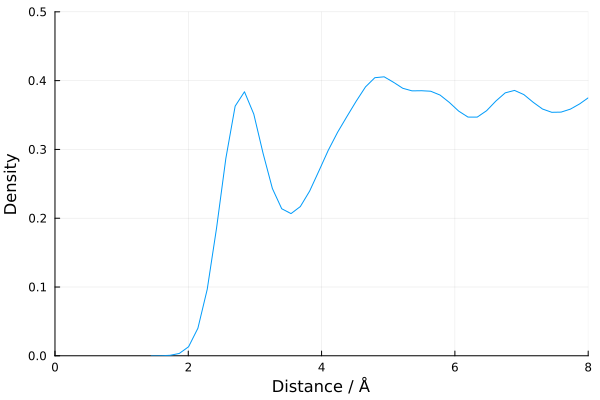

In [42]:
distances_flat = vcat(values(sys.loggers.distance)...)
kd = kde(distances_flat; npoints=200)

plot(
    collect(kd.x) .* 10,
    kd.density ./ (kd.x .^ 2), # Off by a normalisation factor
    xlabel="Distance / Å",
    ylabel="Density",
    xlims=(0, 8),
    ylims=(0, 0.5),
    legend=false,
)

### Exercise 11

- What does this plot tell you?

---

The double exponential potential is a proposed replacement for the Lennard-Jones potential. It has a physically-motivated exponential repulsion, additional flexibility due to global parameters $\alpha$ and $\beta$, and the energy is finite at zero which is useful for some applications. You can read more about it in [Horton et al. 2023](https://doi.org/10.1039/d3dd00070b). The potential energy $V$ is defined as:

$$
V(r_{ij}) = \varepsilon_{ij} \left[ \frac{\beta e^\alpha}{\alpha - \beta} \exp \left( -\alpha \frac{r_{ij}}{r_{m,ij}} \right) - \frac{\alpha e^\beta}{\alpha - \beta} \exp \left( -\beta \frac{r_{ij}}{r_{m,ij}} \right) \right]
$$

where $r_{ij}$ is the interatomic distance and $\varepsilon_{ij}$ and $r_{m,ij}$ are parameters determined by the atom pair.

### Exercise 12

- Derive the force function manually, or using Wolfram Alpha, from the relation $F(r_{ij}) = -\frac{\mathrm{d} V(r_{ij})}{\mathrm{d} r_{ij}}$.
- Define a [custom interaction](https://juliamolsim.github.io/Molly.jl/stable/documentation/#Pairwise-interactions) `DoubleExponential` and associated `potential_energy` and `force` functions for the double exponential potential. The struct should take in $\alpha$ and $\beta$ as arguments, for testing you can use `α = 16.766` and `β = 4.427`. You can use `sqrt(atom_i.ϵ * atom_j.ϵ)` for $\varepsilon_{ij}$ and `2^(1/6) * (atom_i.σ + atom_j.σ) / 2` for $r_{m,ij}$. Also define `Molly.use_neighbors(inter::DoubleExponential) = true`.

Now we can write a function that computes the potential energy for a given interaction and distance.

In [44]:
function pe(inter, dist)
    a1 = Atom(σ=0.3u"nm", ϵ=0.5u"kJ * mol^-1")
    a2 = Atom(σ=0.3u"nm", ϵ=0.5u"kJ * mol^-1")
    boundary = CubicBoundary(10.0u"nm")
    c1 = SVector(1.0, 1.0, 1.0)u"nm"
    c2 = SVector(dist + 1.0u"nm", 1.0u"nm", 1.0u"nm")
    vec = vector(c1, c2, boundary)
    return potential_energy(inter, vec, a1, a2)
end

pe (generic function with 1 method)

### Exercise 13

- Use the `pe` function to get two arrays of potential energy for the distances `(0.2:0.001:0.6)u"nm"`: one with `LennardJones` and one with `DoubleExponential` where `α = 16.766` and `β = 4.427`. Plot these to compare them.
- Plot variants of the double exponential potential for `(α, β)` in `((10.0, 3.0), (20.0, 3.0), (10.0, 6.0), (20.0, 6.0))`. What effect on the shape of the potential does changing $\alpha$ and $\beta$ have?

We can run a simulation with our custom potential.

In [47]:
sys = System(
    "dipeptide_equil.pdb",
    ff;
    rename_terminal_res=false,
    loggers=(
        writer=TrajectoryWriter(10, "trajectory.pdb"),
    ),
)
random_velocities!(sys, 300.0u"K")

α, β = 16.766, 4.427
dexp = DoubleExponential(α, β)

sys = System(
    sys;
    # Replace sys.pairwise_inters[1] (the Lennard-Jones interaction) and keep
    #   sys.pairwise_inters[2] (the Coulomb interaction)
    pairwise_inters=(dexp, sys.pairwise_inters[2]),
)

isfile("trajectory.pdb") && rm("trajectory.pdb")
simulate!(sys, simulator_lang, 1000)

System with 2917 atoms, boundary CubicBoundary{Quantity{Float64, 𝐋, Unitful.FreeUnits{(nm,), 𝐋, nothing}}}(Quantity{Float64, 𝐋, Unitful.FreeUnits{(nm,), 𝐋, nothing}}[3.4224000000000006 nm, 3.9133000000000004 nm, 3.3010999999999995 nm])

[Measurements.jl](https://github.com/JuliaPhysics/Measurements.jl) can be used to propagate uncertainty due to errors. Here we add uncertainty to the system coordinates and velocities and calculate the total energy (don't worry if you get a warning about bits types).

In [48]:
sys = System(
    "dipeptide_nowater.pdb",
    ff;
    rename_terminal_res=false,
    neighbor_finder_type=DistanceNeighborFinder,
)
random_velocities!(sys, 300.0u"K")

coords_err = [c .± (abs(randn()) / 100)u"nm"         for c in sys.coords    ]
vels_err   = [v .± (abs(randn()) / 100)u"nm * ps^-1" for v in sys.velocities]
sys = System(sys; coords=coords_err, velocities=vels_err)

total_energy(sys)

┌ Warning: eltype of coords or velocities is not isbits, it is recomended to use a vector of SVector's for performance
└ @ Molly ~/.julia/dev/Molly/src/types.jl:600


245.0 ± 43.0 kJ mol^-1

### Exercise 14

- Which of the kinetic energy and the potential energy contributes more to the uncertainty in the total energy? Why?
- Calculate the temperature of the system and the forces on the atoms. Comment on the level of uncertainty.

### Additional exercises

- Run a simulation with the `MonteCarloBarostat` to keep the pressure constant at 1 bar. Record the box size over the simulation. How and why does the box size change?
- Remove the Lennard-Jones/double exponential potential from the simulation and see what happens.
- Which of the thermostats available in Molly equilibrates the alanine dipeptide simulation to the desired temperature the fastest? Why?
- Why are there small fluctuations in the potential energy in the NVE simulation in exercise 5?
- Fix the normalisation factor in the radial distribution function of water exercise.
- Using automatic differentiation with Zygote.jl, show that the force arising from the double exponential potential satisfies $F(r_{ij}) = -\frac{\mathrm{d} V(r_{ij})}{\mathrm{d} r_{ij}}$. How accurate is the automatic differentiation? How does the speed of computing the force this way compare to computing it directly? What are other approaches to calculating the force from the potential energy?
- How does the Ramachandran plot of alanine dipeptide change with simulation temperature?
- The observed Ramachandran plot will change between short simulations due to poor sampling. How long does it take for this property to converge, such that any simulation of that length gives a similar Ramachandran plot?